In [1]:
import pandas as pd

In [2]:
geo= pd.read_csv("../data/geo/geo_km.csv")
colex= pd.read_csv("../data/colex/lang2lang_colex.csv")
phon = pd.read_csv("../data/phon/lang2lang_phon.csv")

In [56]:
geo_uriel = pd.read_csv("../data/geo/geo_uriel.csv")

In [59]:
geo_uriel["lang2lang"]=geo_uriel["src"]+"~"+geo_uriel["tgt"]

In [61]:
geo_uriel= geo_uriel[["lang2lang", "geo_distance"]]

In [62]:
df = df.merge(geo_uriel, on="lang2lang")

In [63]:
df

,lang2lang,pmi,phon_sim_avg,GeoDist(KM),geo_distance
0,fra~tur,1.903412,0.383319,2823.881158,0.1
1,fra~tha,1.567659,0.325338,9517.407011,0.1
2,tha~tur,3.305061,0.324537,7006.833597,0.1
3,fin~por,1.284462,0.379618,3396.443556,0.0
4,fin~ind,0.680688,0.376955,10178.076587,0.1
...,...,...,...,...,...
2343,kaz~tuk,11.805887,0.500000,1455.847392,0.1
2344,heb~tuk,8.320460,0.370238,2289.109144,0.0
2345,tuk~tyv,14.712777,0.625000,3117.309314,0.1
2346,fao~nav,8.885434,0.357854,7059.805782,0.0


In [8]:
geo["lang2lang"]= geo["source"] + "~" +geo["target"]
colex["lang2lang"]= colex["source"]+"~"+colex["target"]
phon["lang2lang"] = phon["source"]+"~"+phon["target"]

In [14]:
phon["phon_sim_avg"]= phon["Phon_sim"]/phon["NR_Concept"]

In [15]:
phon 

,source,target,Phon_sim,NR_Concept,lang2lang,phon_sim_avg
0,ell,fin,14269.546713,36084,ell~fin,0.395454
1,ell,por,9759.322370,23935,ell~por,0.407743
2,bul,ell,2514.702212,6098,bul~ell,0.412381
3,ara,ell,7801.394201,18819,ara~ell,0.414549
4,ell,pol,4400.259124,10836,ell~pol,0.406078
...,...,...,...,...,...,...
8853,asm,mnc,0.266667,1,asm~mnc,0.266667
8854,nep,sco,0.153846,1,nep~sco,0.153846
8855,rgn,rus,0.428571,1,rgn~rus,0.428571
8856,hin,rgn,0.533333,2,hin~rgn,0.266667


In [22]:
len(geo)

9453

In [19]:
colex

,pmi,lang2lang
0,1.903412,fra~tur
1,2.112229,eng~fra
2,1.567659,fra~tha
3,2.292736,eng~tur
4,3.305061,tha~tur
...,...,...
6708,10.905422,bel~ltg
6709,13.320460,ltg~zha
6710,1.872983,gle~ltg
6711,13.320460,tuk~zha


In [11]:
colex=colex[["pmi", "lang2lang"]]

In [16]:
geo = geo[["GeoDist(KM)", "lang2lang"]]
phon = phon[["lang2lang", "phon_sim_avg"]]

In [17]:
df = colex.merge(geo, on="lang2lang")

In [20]:
df = df.merge(phon, on="lang2lang")

In [23]:
df =df[["lang2lang", "pmi", "phon_sim_avg", "GeoDist(KM)"]]

In [28]:
df.to_csv("../data/lang2lang/colex_phon_geo.csv", index=False)

In [29]:
df

,lang2lang,pmi,phon_sim_avg,GeoDist(KM)
0,fra~tur,1.903412,0.383319,2823.881158
1,eng~fra,2.112229,0.387361,467.403555
2,fra~tha,1.567659,0.325338,9517.407011
3,eng~tur,2.292736,0.373958,3052.690450
4,tha~tur,3.305061,0.324537,7006.833597
...,...,...,...,...
4794,kat~tuk,6.989116,0.201389,1197.214738
4795,fao~nav,8.885434,0.357854,7059.805782
4796,nav~tuk,13.189215,0.301961,11449.664298
4797,bel~nav,8.381860,0.290222,9160.594791


In [31]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline

In [34]:
def plot_linear(x,y, df):
    X= df[x].values.reshape(-1,1)
    Y= df[y].values.reshape(-1,1)
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)
    plt.scatter(X, Y)
    plt.plot(X, Y_pred, color='red')
    plt.show()

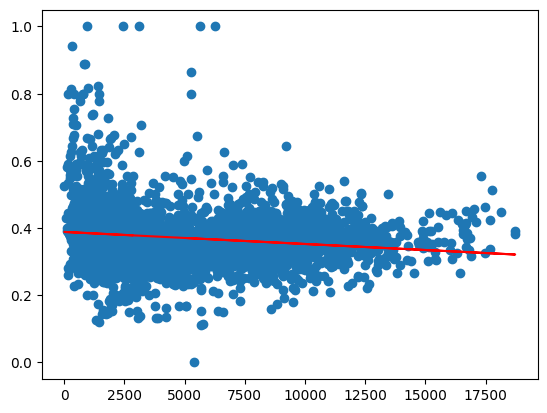

In [35]:
plot_linear("GeoDist(KM)", "phon_sim_avg", df)

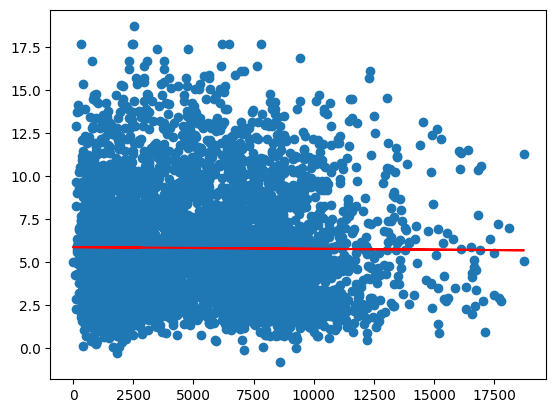

In [37]:
plot_linear("GeoDist(KM)", "pmi", df)

<Axes: xlabel='GeoDist(KM)', ylabel='phon_sim_avg'>

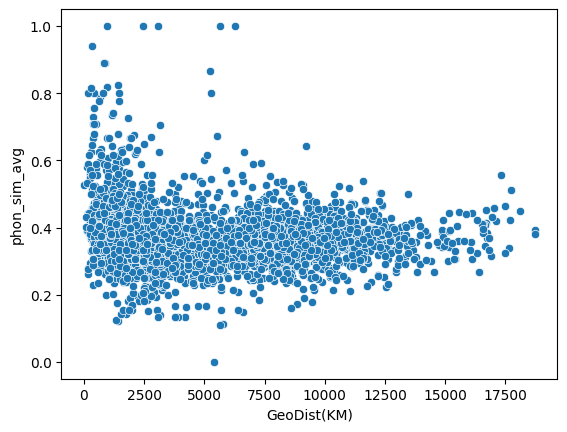

In [40]:
sns.scatterplot(df, x="GeoDist(KM)", y="phon_sim_avg")

<Axes: xlabel='geo_distance', ylabel='phon_sim_avg'>

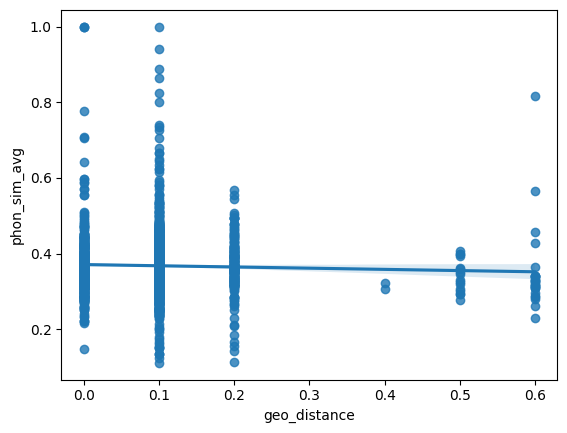

In [64]:
sns.regplot(df, x="geo_distance", y="phon_sim_avg")

In [65]:
df.corr(method="spearman")

/var/folders/bj/qp6k2wl11h5gpn8j4hg0tgf40000gn/T/ipykernel_76317/3994303778.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method="spearman")


,pmi,phon_sim_avg,GeoDist(KM),geo_distance
pmi,1.000000,0.088932,-0.019701,0.073928
phon_sim_avg,0.088932,1.000000,-0.232654,-0.005117
GeoDist(KM),-0.019701,-0.232654,1.000000,-0.020217
geo_distance,0.073928,-0.005117,-0.020217,1.000000


<Axes: xlabel='GeoDist(KM)', ylabel='phon_sim_avg'>

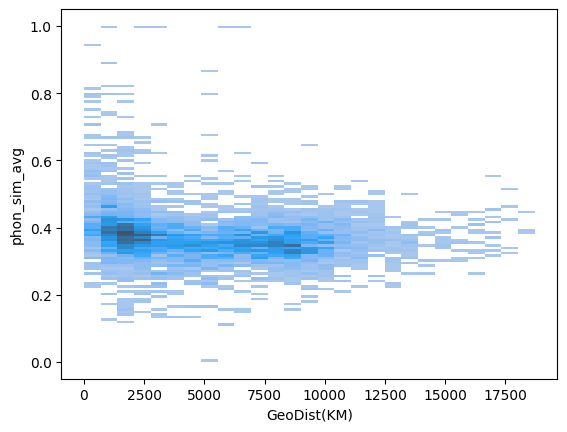

In [55]:
sns.histplot(data=df, y="phon_sim_avg", x="GeoDist(KM)")

In [75]:
from scipy.stats import spearmanr, pearsonr


In [76]:
stat, p = pearsonr(df["pmi"], df["GeoDist(KM)"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

stat=-0.018, p=0.390
Probably independent


In [77]:
stat, p = pearsonr(df["phon_sim_avg"], df["GeoDist(KM)"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=-0.195, p=0.000
Probably dependent


In [72]:
stat, p = spearmanr(df["pmi"], df["GeoDist(KM)"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=-0.020, p=0.340
Probably independent


In [73]:
stat, p = spearmanr(df["phon_sim_avg"], df["GeoDist(KM)"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=-0.233, p=0.000
Probably dependent


<Axes: xlabel='geo_distance', ylabel='phon_sim_avg'>

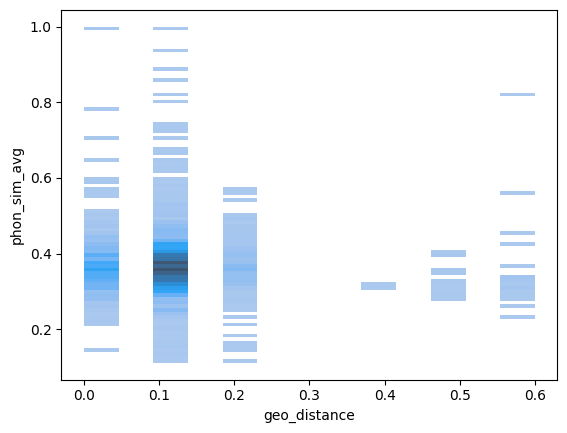

In [66]:
sns.histplot(data=df, y="phon_sim_avg", x="geo_distance")

<Axes: xlabel='pmi', ylabel='geo_distance'>

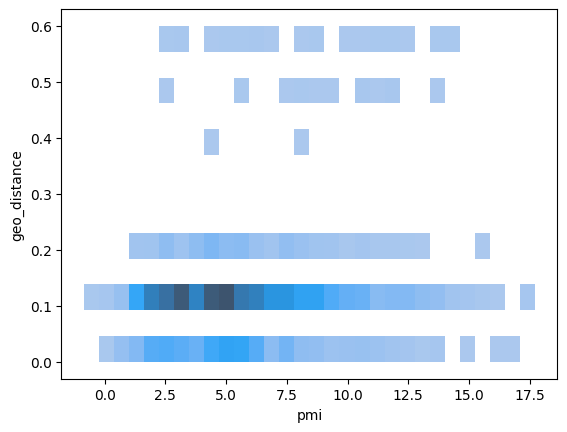

In [68]:
sns.histplot(data=df, x="pmi", y="geo_distance")

/var/folders/bj/qp6k2wl11h5gpn8j4hg0tgf40000gn/T/ipykernel_76317/58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

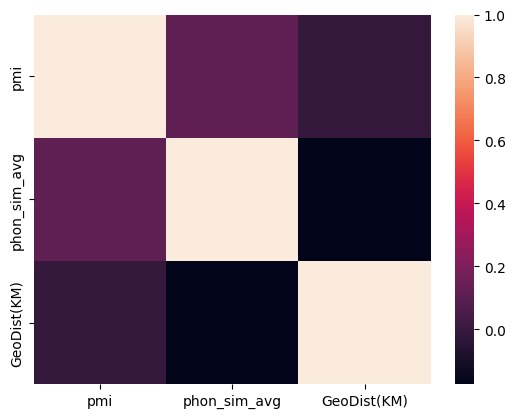

In [46]:
sns.heatmap(df.corr())

<Axes: xlabel='pmi', ylabel='GeoDist(KM)'>

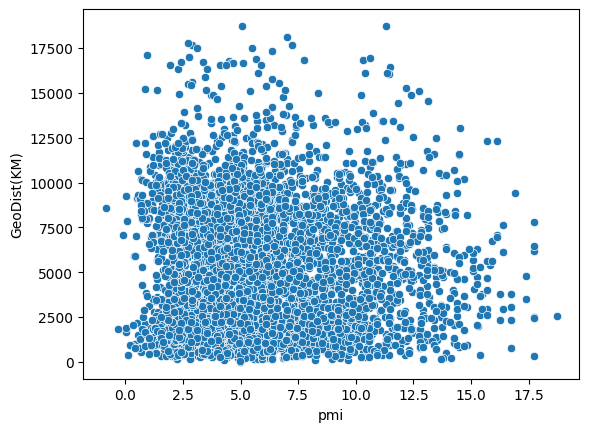

In [42]:
sns.scatterplot(df, x="pmi", y="GeoDist(KM)")

<Axes: xlabel='geo_distance', ylabel='pmi'>

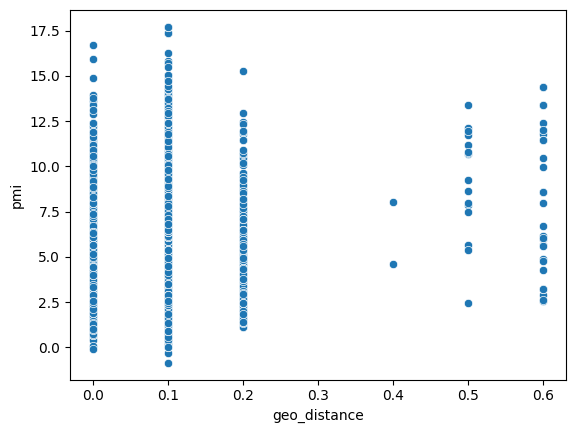

In [70]:
sns.scatterplot(df, y="pmi", x="geo_distance")